In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Importación de datos

Este código carga un archivo CSV llamado **"wine_quality.csv"** en un DataFrame de pandas y muestra las primeras filas del conjunto de datos.

🔹 **¿Para qué sirve?**

Para leer y explorar los primeros registros del dataset, lo que ayuda a entender su estructura y contenido.

🔹 **¿Por qué se utiliza?**

Porque pandas facilita la manipulación de datos tabulares y ***read_csv*** es una forma eficiente de cargar datos en un formato estructurado para su análisis.

In [267]:
df = pd.read_csv("wine_quality.csv")
df.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Análisis exploratorio de datos

Este código inspecciona la estructura y calidad de los datos en el DataFrame.

🔹 **¿Para qué sirve?**

**df.info():** Muestra información general del dataset, como el número de filas y columnas, tipos de datos y valores no nulos.

**df.isnull().sum():** Cuenta la cantidad de valores nulos en cada columna, ayudando a identificar datos faltantes.

🔹 **¿Por qué se utiliza?**

Para comprender la composición del dataset y detectar problemas como valores ausentes o tipos de datos incorrectos antes de su procesamiento.

In [271]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


Unnamed: 0              0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Este código visualiza la distribución de la variable **"quality"** en el dataset de vinos usando un gráfico de barras.

🔹 **¿Para qué sirve?**
Para observar la frecuencia de cada categoría de calidad del vino y detectar si hay clases desbalanceadas.

🔹 **¿Por qué se utiliza?**
Porque **sns.countplot()** de Seaborn facilita la representación visual de variables categóricas, lo que ayuda a entender mejor la distribución de los datos antes del modelado.

Text(0.5, 1.0, 'Distribución de la Calidad del Vino')

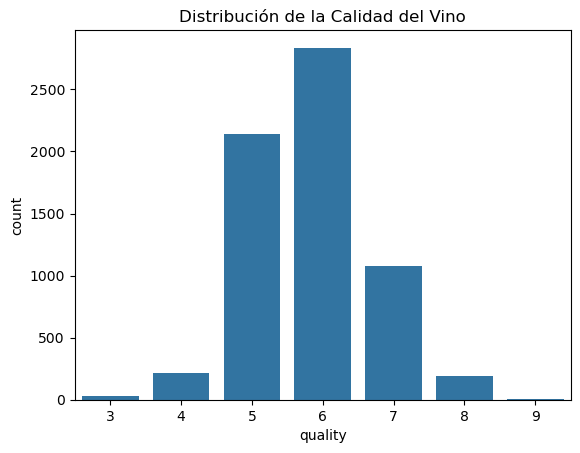

In [274]:
sns.countplot(x=df["quality"])
plt.title("Distribución de la Calidad del Vino")

Este código genera un mapa de calor para visualizar la correlación entre las variables del dataset.

🔹 **¿Para qué sirve?**
Para identificar relaciones entre variables, destacando aquellas que están altamente correlacionadas, lo que puede ayudar en la selección de características para un modelo de Machine Learning.

🔹 **¿Por qué se utiliza?**
Porque la función **sns.heatmap()** de Seaborn permite representar gráficamente la matriz de correlación, facilitando la interpretación de patrones y redundancias en los datos.

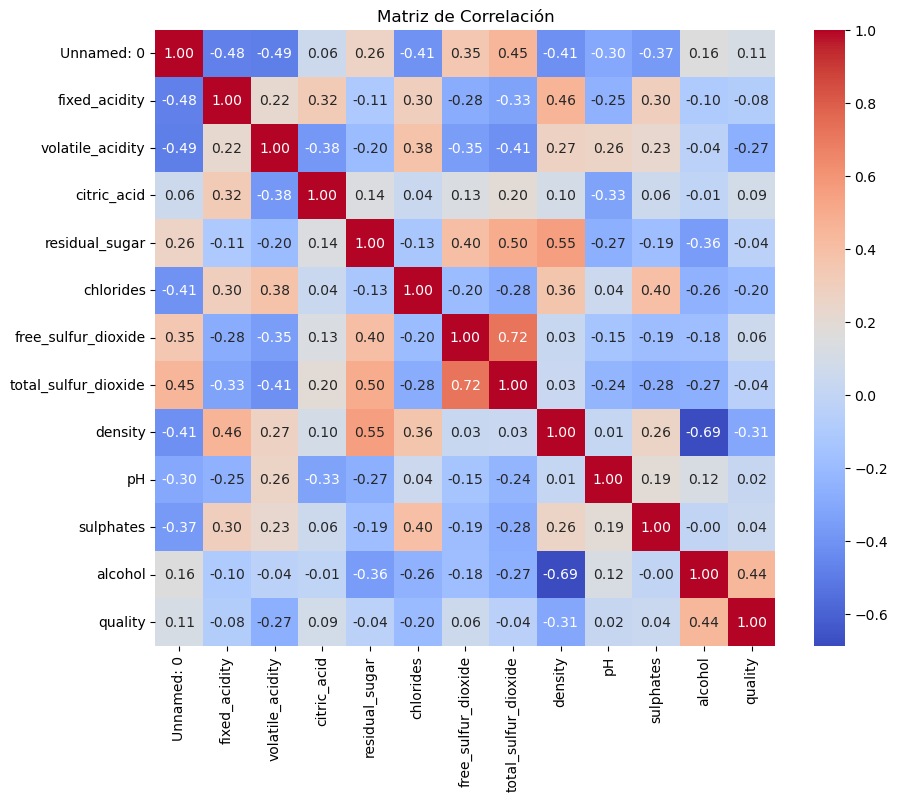

In [277]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Preprocesamiento 

Este código separa las características **(X)** y la variable objetivo **(y)** del dataset.

🔹 **¿Para qué sirve?**
Para preparar los datos para un modelo de Machine Learning, donde **X** contiene las variables predictoras y y la variable que se quiere predecir **("quality")**.

🔹 **¿Por qué se utiliza?**
Porque en el aprendizaje supervisado es necesario dividir los datos en entradas **(features)** y salidas **(target)** para entrenar un modelo correctamente.

In [290]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop("quality", axis=1))
y = df["quality"]

# Definir datos de entrenamiento y de testeo

Este código divide los datos en conjuntos de entrenamiento y prueba.

🔹 **¿Para qué sirve?**
Para entrenar un modelo de Machine Learning con **X_train**, **y_train** y luego evaluar su desempeño con **X_test**, **y_test**.

🔹 **¿Por qué se utiliza?**

**test_size=0.2:** Usa el 20% de los datos para prueba y el 80% para entrenamiento.
**random_state=42:** Garantiza que la división sea reproducible.
**stratify=y:** Mantiene la misma proporción de clases en los conjuntos de entrenamiento y prueba, evitando desbalanceo en la distribución de la variable objetivo.

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar diferentes modelos y compararlos

Este código entrena y evalúa varios modelos de clasificación en el dataset de calidad del vino.

🔹 **¿Para qué sirve?**

Para comparar el rendimiento de diferentes algoritmos de Machine Learning midiendo su precisión **(accuracy)** en el conjunto de prueba.

🔹 **¿Por qué se utiliza?**

- Se prueban múltiples modelos **(DecisionTreeClassifier, LogisticRegression, SVC, etc.)** para encontrar el más efectivo.
- **model.fit(X_train, y_train):** Entrena cada modelo con los datos de entrenamiento.
- **model.predict(X_test):** Genera predicciones en los datos de prueba.
- **accuracy_score(y_test, y_pred):** Calcula la precisión del modelo.
- Los resultados se almacenan en **results** y se imprimen para compararlos.
  
Este enfoque ayuda a seleccionar el mejor modelo para la clasificación de la calidad del vino.

In [298]:
models = {
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Red Neuronal": MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: {accuracy:.2f}")


Árbol de Decisión: 0.61
Regresión Logística: 0.54
SVM: 0.58
KNN: 0.56
Random Forest: 0.69
Gradient Boosting: 0.59
Red Neuronal: 0.59


Este código visualiza la precisión **(accuracy)** de los modelos comparados en un gráfico de barras horizontales.

🔹 **¿Para qué sirve?**

Para comparar el rendimiento de los distintos modelos de Machine Learning de forma clara y visual.

🔹 **¿Por qué se utiliza?**

Este gráfico facilita la interpretación de cuál modelo tiene mejor desempeño en la clasificación de la calidad del vino.

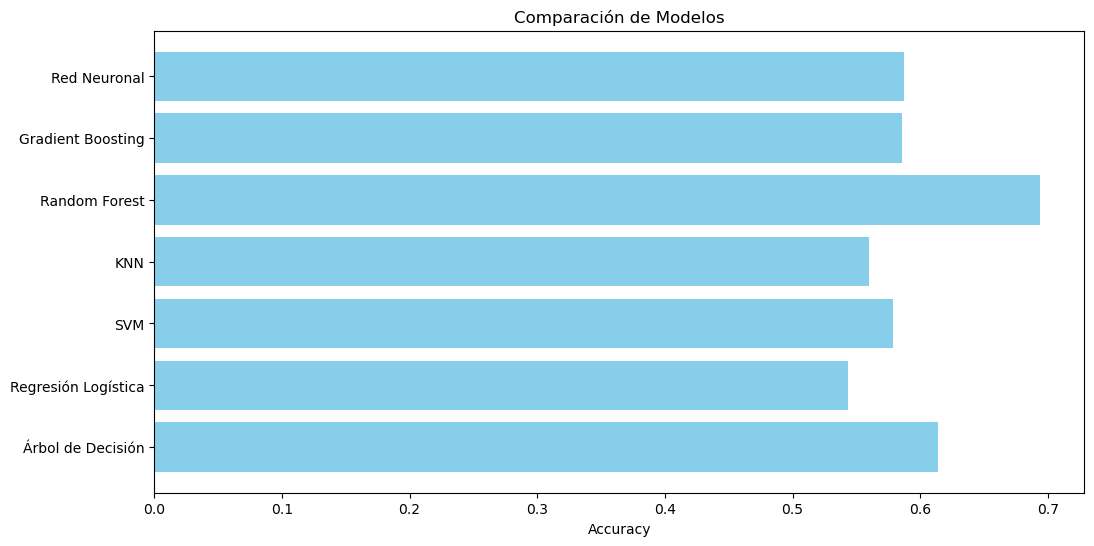

In [301]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(list(results.keys()), list(results.values()), color="skyblue")
plt.xlabel("Accuracy")
plt.title("Comparación de Modelos")
plt.show()

Este código identifica el modelo con mejor precisión y lo imprime.

🔹 **¿Para qué sirve?**

Para seleccionar automáticamente el modelo con mayor **accuracy** en el conjunto de prueba.

🔹 **¿Por qué se utiliza?**

- **max(results, key=results.get):** Encuentra el modelo con el valor de precisión más alto.
- **results[best_model_name]:** Obtiene la precisión del mejor modelo.
- Se imprime el nombre del mejor modelo junto con su precisión.
  
Este paso permite elegir el modelo más efectivo para la clasificación de la calidad del vino.

# Selección del mejor modelo (Random Forest)

In [304]:
best_model_name = max(results, key=results.get)
print(f"El mejor modelo es: {best_model_name} con precisión de {results[best_model_name]:.4f}")

El mejor modelo es: Random Forest con precisión de 0.6938


# Buscar y seleccionar los mejores hiperparametros para Random Forest

Este código realiza búsqueda de hiperparámetros para un **Random Forest** utilizando **GridSearchCV**.

🔹 **¿Para qué sirve?**

Para encontrar la mejor combinación de hiperparámetros y mejorar el rendimiento del modelo.

🔹 **¿Por qué se utiliza?**

- **param_grid:** Define las combinaciones de hiperparámetros a probar.
- **RandomForestClassifier(random_state=42):** Modelo base.
- **GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2):**
    - **cv=5:** Valida con 5 particiones para mejorar la generalización.
    - **scoring="accuracy":** Optimiza la precisión del modelo.
    - **n_jobs=-1:** Usa todos los núcleos de la CPU para acelerar la búsqueda.
 - **grid_search.fit(X_train, y_train):** Entrena y evalúa el modelo con todas las combinaciones posibles.

Este proceso ayuda a encontrar el mejor conjunto de hiperparámetros para optimizar el rendimiento del Random Forest en la clasificación de la calidad del vino.

In [ ]:
# Definir el espacio de hiperparámetros a probar
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Inicializar el modelo
rf = RandomForestClassifier(random_state=42)

# Grid Search con validación cruzada
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Este código muestra los mejores hiperparámetros encontrados por **GridSearchCV**.

In [309]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)


Mejores parámetros encontrados:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


# Evaluando el modelo

Este código evalúa el modelo Random Forest optimizado con los mejores hiperparámetros encontrados en la búsqueda de **GridSearchCV**.

🔹 **¿Para qué sirve?**
Para medir si la optimización mejoró el rendimiento del modelo en comparación con la versión inicial.

🔹 **¿Por qué se utiliza?**

- **grid_search.best_estimator_:** Obtiene el mejor modelo encontrado.
- **y_pred = best_rf.predict(X_test):** Genera predicciones en los datos de prueba.
- **accuracy_score(y_test, y_pred):** Calcula la precisión del modelo optimizado.

Este paso permite verificar si la búsqueda de hiperparámetros realmente mejoró la precisión del modelo Random Forest en la clasificación de la calidad del vino.

In [312]:
best_rf = grid_search.best_estimator_

# Predicciones
y_pred = best_rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy después de la optimización: {accuracy:.4f}")


Accuracy después de la optimización: 0.6946


Este código muestra la matriz de confusión de las predicciones del modelo optimizado.

**La matriz de confusión es útil para evaluar el desempeño detallado del modelo, identificando errores en clases específicas y mejorando su interpretación.**

<Axes: >

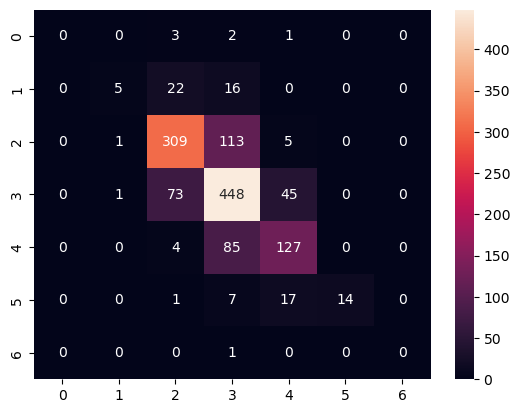

In [315]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

Este código visualiza la **distribución de errores en las predicciones** del modelo optimizado.

Este análisis ayuda a identificar **sesgos del modelo**, por ejemplo, si tiende a sobrestimar o subestimar ciertas clases.

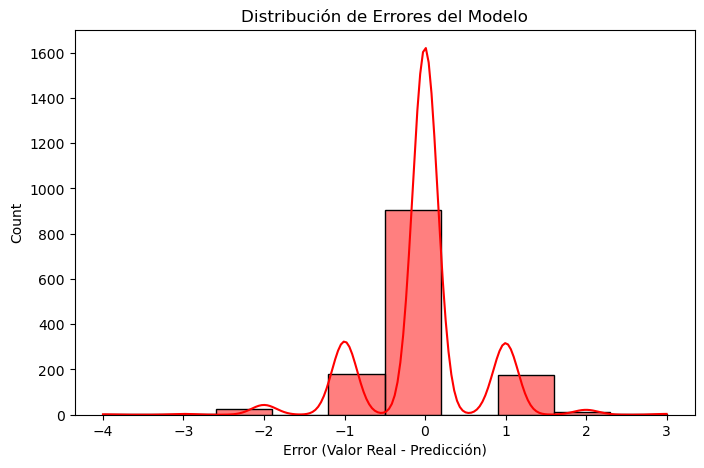

In [325]:
errors = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(errors, bins=10, kde=True, color="red")
plt.xlabel("Error (Valor Real - Predicción)")
plt.title("Distribución de Errores del Modelo")
plt.show()

Este código visualiza la **importancia de las características** en el modelo Random Forest optimizado.

Este análisis ayuda a **seleccionar las características más relevantes**, lo que puede mejorar el rendimiento y la interpretabilidad del modelo.

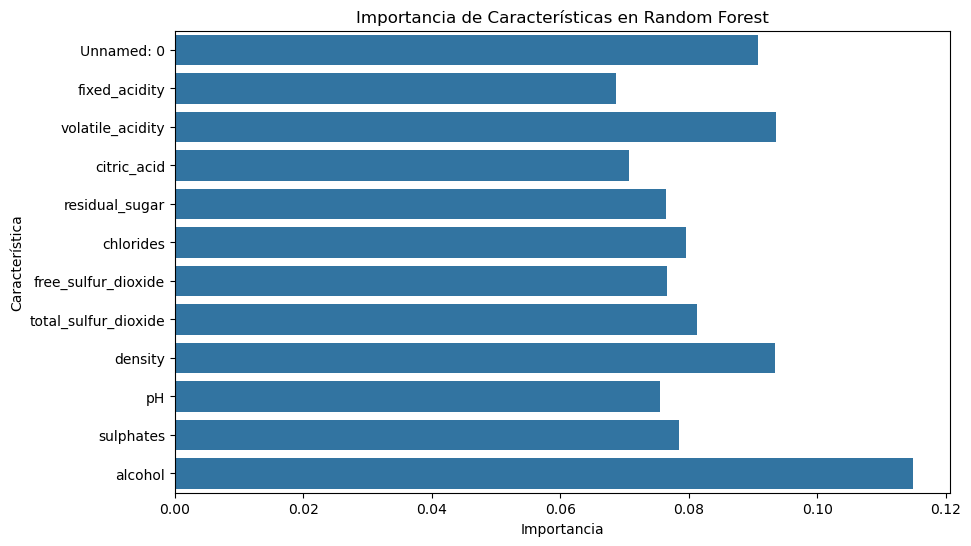

In [337]:
importances = best_rf.feature_importances_
feature_names = df.drop("quality", axis=1).columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)  # Eliminar 'palette'
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.title("Importancia de Características en Random Forest")
plt.show()

# Conclusiones

Las gráficas muestran los resultados clave del modelo Random Forest:

🔹**Matriz de Confusión:**

- Muestra cómo el modelo clasificó los datos.
- La mayoría de los errores ocurren en clases cercanas, lo que indica que el modelo tiene problemas para diferenciar calificaciones similares.

🔹**Distribución de Errores:**

- La mayoría de los errores están alrededor de 0, lo que sugiere que el modelo predice bastante bien.
- Se observan algunos picos en errores positivos y negativos, indicando posibles mejoras.

🔹**Importancia de Características:**

- **Alcohol** es la característica más influyente.
- **volatile_acidity** y **density** también tienen un peso importante en la clasificación.